### Feasibility of learning

Consider the basic problem in supervised learning:

The learner gets to see a finite sample $\mathcal{D} = \{(\bar{x}_1,y_1,\ldots,\bar{x}_n,y_n)\}$

from an unknown target function $f:\mathcal{X}\rightarrow\mathcal{Y}$.

You want to predict what $f$ would do on a new instance $\bar{x} \in \mathcal{X}$ which is not in the sample.


### Feasibility of learning

Let  $\mathcal{X}=\mathbb{Z}$ and $\mathcal{Y} = \{0,1\}$.

Suppose $\mathcal{D} = \{(1,0),(2,0),(3,0)\}$.

That means $f(1)=f(2)=f(3)=0$.

Consider $f(4)$. 

What should we guess that it is?  

Why?  How do we know that $f$ is not a very complicated rule?

If $f$ can really be anything then there is no reason to have any belief about the values of $f$ outside $\mathcal{D}$.

### A different question

Rather than tackling this tough problem head on we will try to answer an easier one.

* Given a function $h:\mathcal{X} \rightarrow \mathcal{Y}$, how similar is $h$ to $f$?

To make *this* question make sense, we assume that there is some probability distribution $P$ over $\mathcal{X}$ from which the examples in $\mathcal{D}$ are drawn. 

This corresponds to real life:  There seems to be some real probability distribution that determines the features of the people you meet, the cars you see, the trees in the forest, etc.


### The distribution on $\mathcal{X}$

Suppose that $\mathcal{X}$ are the features of frogs: length, weight, tongue length, color

All of these features could take on any value in principle.

But which ones are you likely to actually see?

Those are the ones in $\mathcal{D}$. 

![img](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2FkT3sktb6U0E%2Fhqdefault.jpg&f=1&nofb=1)

### The distribution on $\mathcal{X}$

In our cat classification exercise we imagined that $\mathcal{X}$ is all 256x256 pixel images.

Which of those are you likely to actually see on the internet, or as a result of taking a photograph?


$\mathcal{D}$ gives us a sample showing which $\bar{x}\in \mathcal{X}$ are likely to be encountered.  

This is what $P$ is.



### How good is a hypothesis $h$?

The measure of how well $h:\mathcal{X} \rightarrow \mathcal{Y}$ approximates $f$ is:

$$E_{out}(h) = P[h(\bar{x}) \neq f(\bar{x})]$$

where $P$ is the probability distribution over $\mathcal{X}$ that generates examples (i.e. $\mathcal{D}$).

In other words if we pick some $\bar{x} \in \mathcal{X}$ at random (according to the distribution $P$) how likely is it that $f$ and $h$ agree on this instance?

This is **out of sample error** and it is the ultimate measure of the quality of a hypothesis. 

### How good a hypothesis is $h$?

Unfortunately, it is generally impossible to know $E_{out}(h)$, because we don't know $P$ or $f$.

However $\mathcal{D}$ gives us data about both $f$ and $P$.

We assume that the $\bar{x}$ in $\mathcal{D}$ were drawn independently according to $P$.

And of course in supervised learning $\mathcal{D}$ also tell us $y = f(\bar{x})$.

The bigger $\mathcal{D}$ is, the more we know about $f$ and $P$.


### In sample error


We use $\mathcal{D}$ to compute the **in sample error**:

$$E_{in}(h) = \frac{1}{N}\sum_{n=1}^N [\![ h(\bar{x}_n) \neq f(\bar{x}_n)]\!]$$

This is just the proportion of $\mathcal{D}$ for which $h$ says the same thing as $f$.

For example if $\mathcal{D} = \{(a,0),(b,1),(c,0)\}$ and $h(a)=h(b)=h(c)=0$, then

$$E_{in}(h) = \frac{1}{3}(0+1+0) = \frac{1}{3}$$

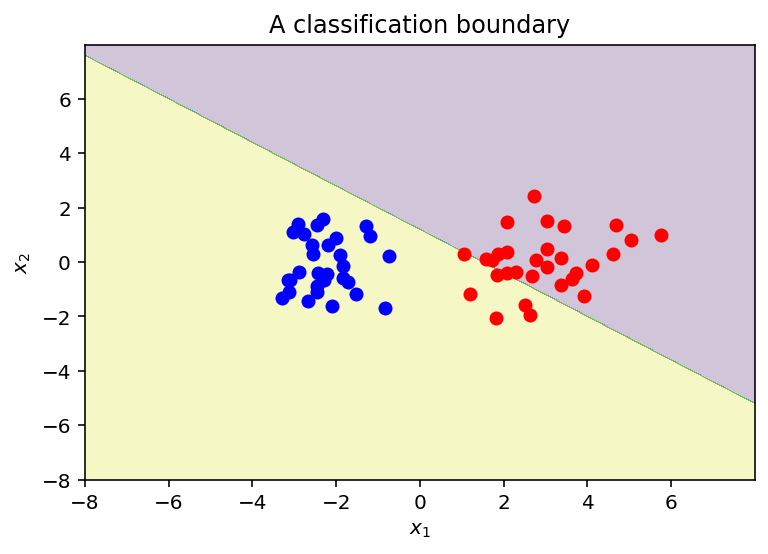

In [1]:
import mystuff as ms
import numpy as np


X,y,w = ms.myblobs(N=30)
ms.lin_boundary(w,X,y)


In [2]:
numwrong = np.sum(np.sign(X.dot(w)) != y)
numX = X.shape[0]
E_in = numwrong/numX
E_in

0.1

### $E_{in} \approx E_{out}$?

So, to summarize we know $E_{in}(h)$ but we want to know $E_{out}(h)$.  

But measuring $E_{out}(h)$ is generally impossible. 

But because of probability theory $E_{in}(h)$ and $E_{out}(h)$ must be pretty close.

Why is this true?

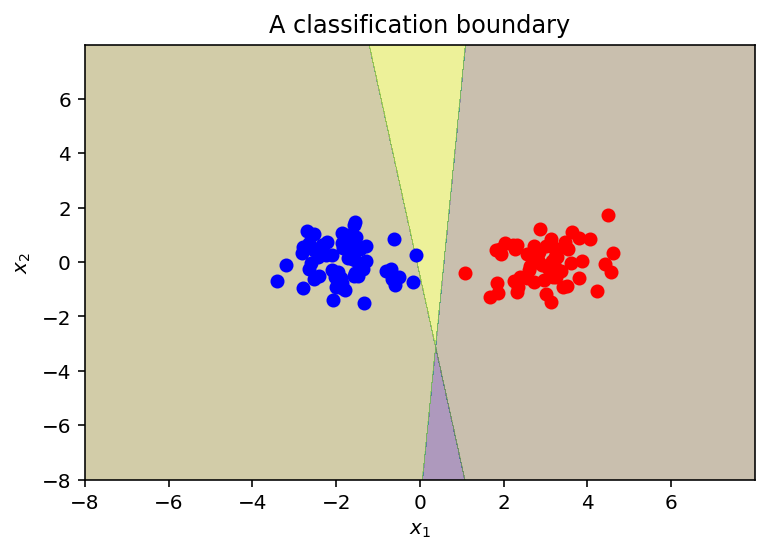

In [3]:
import numpy as np
import mystuff as ms

np.random.seed(101)
X=np.array([]).reshape(0,3)
y=np.array([])
w = np.array([1,-2,3])
X,y,w = ms.myblobs(N=60,sig_yes=0.7,sig_no=0.7)
w=[0.5,7,1]
wp = np.linalg.pinv(X).dot(y)
ms.compare_boundary(w,wp,X,y)
#ms.lin_boundary(wp,X,y)

### The image above

This image shows $h$ vs $f$ for made up data.

The boundary with positive slope is $f$.

The yellow and purple regions are where $h$ and $f$ disagree.

The probability of a dot landing here is $E_{out}(h) = \mathbb{P}_{\bar{x}\in \mathcal{X}}[h(\bar{x})\neq f(\bar{x})]$

The proportion of dots actually in the purple or yellow region is $E_{in}(h)$

When $h$ is picked **before** the data it is likely that these values are close.

### You have to urn it

Suppose that every $\bar{x} \in \mathcal{X}$ is a ball in an urn.

We color the ball green if $h(\bar{x}) = f(\bar{x})$ and red if $h(\bar{x}) \neq f(\bar{x})$

$E_{out}(h)$ is the probability of pulling a red ball out of the urn. 

$E_{in}(h)$ is the proportion of red balls you see if you actually pull $N=|\mathcal{D}|$ of them out and check what you get. 

The (frequentist) **meaning** of $E_{out}$ is just the limit of $E_{in}$ as $N \rightarrow \infty$.

So for big $N$ they should be close together.



In [4]:
import numpy as np
N=1000
E_out = 0.1
red, green = 1,0
D = np.random.choice([red,green],N,p=[E_out,1-E_out])
E_in = np.sum(D)/N
print("E_in = {}".format(E_in))
print("E_out = {}".format(E_out))


E_in = 0.1
E_out = 0.1


### Shoulda woulda coulda

We said that $E_{in}(h)$ and $E_{out}(h)$ "should" be close in value, and we can see from our little program (above) that they actually are.

They **might** differ by a lot if you are super unluckly.

But it is very unlikely that you will be extremely unlucky.

$E_{in}(h)$ and $E_{out}(h)$ are **probably approximately equal**.

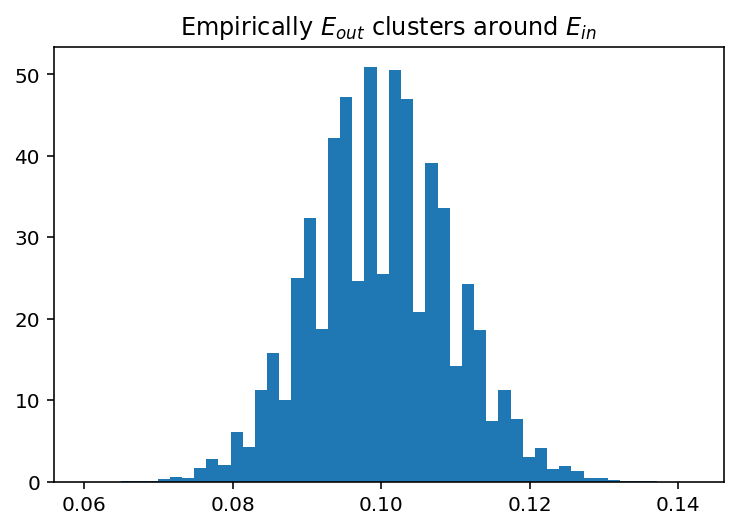

In [5]:
N=1000
E_out = 0.1
red, green = 1,0
E_ins = []
for tries in range(100000):
    D = np.random.choice([red,green],N,p=[E_out,1-E_out])
    E_in = np.sum(D)/N
    E_ins.append(E_in)

import matplotlib.pyplot as plt
E_ins = np.array(E_ins)
plt.hist(E_ins,bins=50,density=True)
plt.title(r"Empirically $E_{out}$ clusters around $E_{in}$")
plt.show()

### Probably approximately equal

The Hoeffding bound is a mathematical formula that rigorously defines "probably approximately equal".

It says that, for any $\epsilon > 0$,

$$P[|E_{in}(h)-E_{out}(h)| > \epsilon] \leq 2e^{-2\epsilon^2N}$$

In words:  The probability that $E_{in}(h)$ and $E_{out}(h)$ differ by more than a tiny amount $\epsilon$ decreases exponentially as $N \rightarrow \infty$.

But for small $\epsilon$, the term $\epsilon^2$ will be **really** small and slow down the convergence.

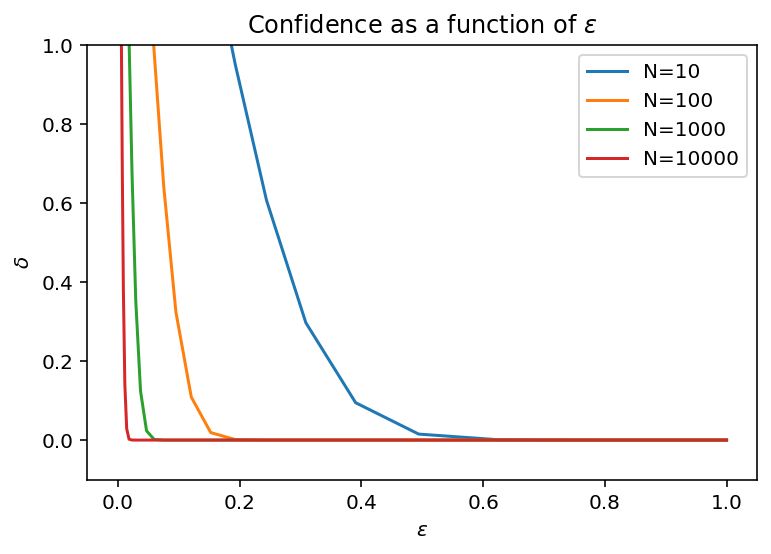

In [6]:
import matplotlib.pyplot as plt

for N in [10,100,1000,10000]:

    epsilon = np.logspace(0,-5)
    delta = 2*np.exp(-2*epsilon**2*N)
    plt.plot(epsilon,delta,label="N={}".format(N))
plt.xlabel(r"$\epsilon$")
plt.ylabel(r"$\delta$")
plt.legend()
x1,x2,y1,y2 = plt.axis()

plt.axis((x1,x2,y1,1))
plt.title(r"Confidence as a function of $\epsilon$")
plt.show()

### The Graph Above

The above graph shows $\epsilon$ vs the Hoeffding bound on the proportion of samples that have $E_{out}$ and $E_{in}$ more than $\epsilon$ apart.

This also depends on $N$, which is the "size of the draw".

For small draws you can get unlucky ($E_{out}$ far from $E_{in}$)

But this is increasingly unlikely for draws of larger size.

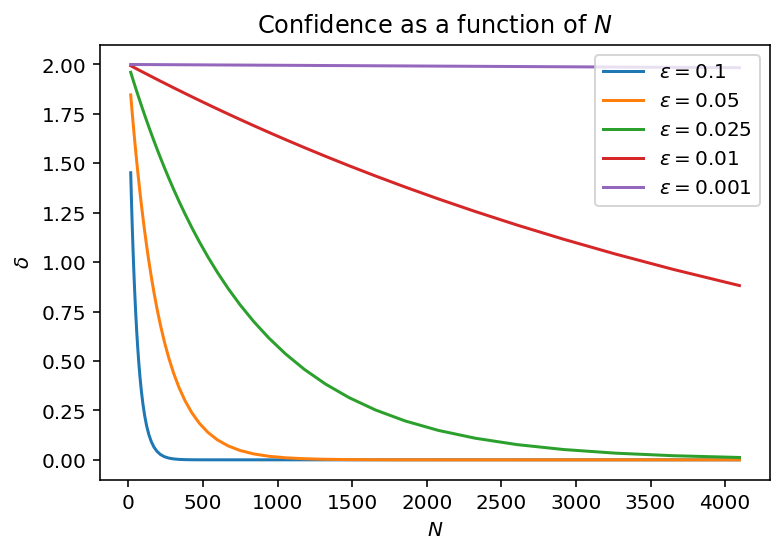

In [7]:
for epsilon in [0.1,0.05,0.025,0.01,0.001]:
    N = np.logspace(4,12,base=2)
    delta = 2*np.exp(-2*epsilon**2*N)
    plt.plot(N,delta,label=r"$\epsilon= {}$".format(epsilon))
plt.ylabel(r"$\delta$")
plt.xlabel(r"$N$")
plt.legend()
plt.title(r"Confidence as a function of $N$ ")
plt.show()

### The Graph Above

This graph shows how the increase of $N$ (the size of the draw) causes the likelihood of a "bad" draw to decrease.

A "bad" draw is one in which $E_{in}$ and $E_{out}$ are far apart.

Because "far" depends on $\epsilon$, you get different curves as the notion of "far" becomes more and more strict.

Notice that for $\epsilon=0.01$ and $\epsilon=0.001$ the Hoeffding bound is not really a bound at all until $N$ exceeds 4000.  


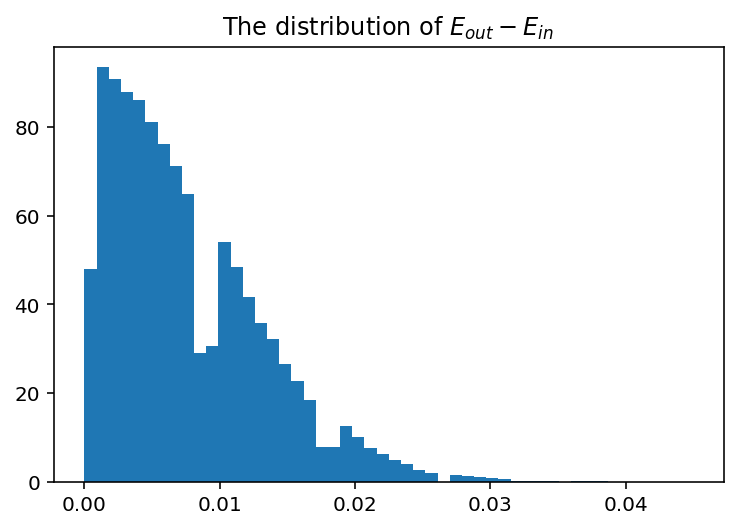

In [8]:
N=1000
E_out = 0.1
red, green = 1,0
difs = []
for tries in range(100000):
    D = np.random.choice([red,green],N,p=[E_out,1-E_out])
    E_in = np.sum(D)/N
    difs.append(np.abs(E_in-E_out))

import matplotlib.pyplot as plt
difs = np.array(difs)
hist=plt.hist(difs,bins=50,density=True)

plt.title(r"The distribution of $E_{out} - E_{in}$ ")
plt.show()

### Hoeffding is "distribution free"

The amazing thing about the Hoeffding inequality is that the right hand side does not depend on $P$.

$$P[|E_{in}(h)-E_{out}(h)| > \epsilon] \leq 2e^{-2\epsilon^2N}$$

It is true for *all* $P$, even the worst possible $P$.

For that reason, the bound is usally *very* conservative.

In [9]:
import numpy as np
N = 100
E_out = 0.1
red, green = 1,0

results = []
numtries = 10000
for tries in range(numtries):
    D = np.random.choice([red,green],N,p=[E_out,1-E_out])
    E_in = np.sum(D)/N
    results.append(E_in)

E_ins = np.array(results)
epsilon = 0.09
exceeded = np.abs(E_ins-E_out)>epsilon
print("Difference exceeds epsilon {}% of time".format(100*np.mean(exceeded)))
print("Hoeffding bound: at most {0:.2f}% of time".format(200*np.exp(-2*epsilon**2*N)))

Difference exceeds epsilon 0.27% of time
Hoeffding bound: at most 39.58% of time


### So what have we learned?

We have learned that in the special case $\mathcal{H} = \{h\}$

if $\mathcal{D}$ is large

and

**if** $E_{in}(h)$ is small

Then $E_{out}(h)$ is *probably* also small, 

and therefore when we see a new instance $\bar{x} \in \mathcal{X}$ it is likely that

$h(\bar{x}) = f(\bar{x})$.


### BUT

We have learned that in the special case $\mathcal{H} = \{h\}$

if $\mathcal{D}$ is large

and

if $E_{in}(h)$ is **large**

Then $E_{out}(h)$ is *probably* also **large**, 

and therefore when we see a new instance $\bar{x} \in \mathcal{X}$ it **not likely** that

$h(\bar{x}) = f(\bar{x})$.


### So what have we learned?

If $E_{in}(h)$ is not small then there's really not much we can do with $h$.

And if $\mathcal{H}$ only has one hypothesis in it, we would really be pretty lucky if it were any good.

What we need is some guarantee that 

if $\mathcal{H}$ is big

and we take the $g \in \mathcal{H}$ for which $E_{in}$ **is least**

$$g = argmin_{h \in \mathcal{H}}E_{in}(h)$$

then $E_{in}(g)$ is *still* close to $E_{out}(g)$

### Too much!

But that's too much to ask for **when $\mathcal{H}$ can be anything**.  

Because if $\mathcal{H}$ is big enough then any function is in there.

There may be the function $h$ that behaves just like $f$ on $\mathcal{D}$ but just the opposite of $f$ for examples not in $\mathcal{D}$.

Then $E_{in}(h) = 0$ but $E_{out}(h)=1$!

In other words $E_{in}$ and $E_{out}$ are as far apart as possible.

This tells us that we must consider only a special kind of "nice" $\mathcal{H}$ (described in Ch 2).

Finiteness is a special kind of "niceness"

Let's consider what happens when $\mathcal{H}$ is finite.

### $\mathcal{H} = \{h_1,h_2,\ldots,h_m\}$

Consider a hypothesis class $\mathcal{H}$ with $m$ hypotheses.

Each $h_i$ has an out of sample error rate $E_{out}(h_i)$.

Each $h_i$ also has an in sample error rate $E_{in}(h_i)$.

If $\mathcal{H}$ is big compared to $\mathcal{D}$, then through luck one of the $h_i$ may have $E_{in}(h_i)$ freakishly small, while

$E_{in}(h_i) \not \approx E_{out}(h_i)$.

We might naively **think** that this hypothesis is best, because it does best on $\mathcal{D}$.

But really the performance on $\mathcal{D}$ was a fluke.

### Luck vs skill  $(E_{in} vs E_{out}?)$

Entities that are exceptional are exceptional for two reasons: luck and skill.

Skill persists but luck does not.  

Consider 100 people, each of whom flip a fair coin ten times.

We simulate this below.  Each column is a "person".

The row corresponding to a person is their flipping record.


In [10]:
import numpy as np
## |D|=10, |H|=100
flips = np.random.randint(0,2,100*10).reshape(10,100)

mu = np.mean(flips,axis=0)
mu

array([0.4, 0.1, 0.6, 0.5, 0.3, 0.4, 0.6, 0.5, 0.7, 0.4, 0.5, 0.6, 0.5,
       0.5, 0.4, 0.6, 0.7, 0.5, 0.2, 0.6, 0.5, 0.3, 0.5, 0.5, 0.3, 0.4,
       0.4, 0.2, 0.8, 0.5, 0.5, 0.7, 0.4, 0.6, 0.5, 0.6, 0.3, 0.4, 0.7,
       0.6, 0.6, 0.4, 0.5, 0.6, 0.5, 0.5, 0.4, 0.4, 0.2, 0.4, 0.6, 0.6,
       0.7, 0.6, 0.4, 0.3, 0.3, 0.6, 0.5, 0.4, 0.9, 0.4, 0.6, 0.6, 0.6,
       0.4, 0.5, 0.8, 0.8, 0.5, 0.5, 0.3, 0.6, 0.5, 0.5, 0.4, 0.5, 0.7,
       0.8, 0.7, 0.4, 0.6, 0.5, 0.4, 0.5, 0.6, 0.6, 0.5, 0.6, 0.7, 0.3,
       0.4, 0.4, 0.5, 0.5, 0.3, 0.6, 0.2, 0.6, 0.3])

In [11]:
best_person = np.argmax(mu)
best_person, mu[best_person]

(60, 0.9)

### Wow, what a performance!

Someone has a real tendency to flip heads.

Or do they?

Do you think their luck will hold up in ten more flips?


In [12]:
flips = np.random.randint(0,2,100*10).reshape(10,100)
mu = np.mean(flips,axis=0)
mu[best_person]

0.6

### Uh oh, must have been the pressure?

Obviously the ability to flip heads does not persist.

The best person's performance was all luck and no skill.

When we tested the person on fresh data the luck vanished and only the skill remained.

With only skill and no luck to rely on, performance decreased.

This is called **regression to the mean**.

We have to be very careful about this in ML when evaluating model performance (and in life too).

You want the best model, not the luckiest one.

### Hoeffding?

If we pick the best $g \in \mathcal{H}$ with respect to $E_{in}$ then the Hoeffding bound does not apply.  

To show this you could check the percentage of time that the best of 1000 coin flippers (in 100 flips) has a sample average different from 0.5 by more than $\epsilon = 0.1$.

We compute the Hoeffding bound below. 

After that we perform an experiment to see how often epsilon is actually exceeded by the best flipper.

In [13]:
answer=2*np.exp(-2*0.1**2*100)
print("If Hoeffding holds for the best flipper,\n then the difference between E_in and E_out \n will exceed epsilon at most {:0.2f}% of the time".format(100*answer))

If Hoeffding holds for the best flipper,
 then the difference between E_in and E_out 
 will exceed epsilon at most 27.07% of the time


In [14]:
num_experiments = 10**4
epsilon=0.1
epsilon_exceeded = 0
for i in range(num_experiments):
    flips = np.random.randint(0,2,100*1000).reshape(100,1000)
    mu = np.mean(flips,axis=0)
    best_person = np.argmax(mu)
    best_record = np.max(mu)
    diff = np.abs(best_record-0.5)
    if diff > epsilon:
        epsilon_exceeded +=1
answer = epsilon_exceeded/num_experiments                
print("The difference exceeded epsilon {:0.2f}% of the time".format(100*answer))        


The difference exceeded epsilon 100.00% of the time


### A crude bound

We **can** come up with a Hoeffding like bound assuming that $\mathcal{H}$ contains $M$ hypotheses. 

Because the probability that the **best** $g$ has $E_{in}$ within $\epsilon$ of $E_{out}$

is at most the probability that **some** $h$ has $E_{in}$ within $\epsilon$ of $E_{out}$.

$$P[|E_{in}(g)-E_{out}(g)| > \epsilon] \leq \sum_{h \in \mathcal{H}} P[|E_{in}(h)-E_{out}(h)| > \epsilon]$$

But Hoeffding **does** apply to each summand in RHS because each $h$ was picked before $\mathcal{D}$.  Thus

$$P[|E_{in}(g)-E_{out}(g)|>\epsilon] \leq 2Me^{-2\epsilon^2N}$$


### But are we happy with that?

We are not very happy with the bound 

$$P[|E_{in}(g)-E_{out}(g)|>\epsilon] \leq 2Me^{-2\epsilon^2N}$$

because $\mathcal{H}$ is often very large, or even infinite.

The perceptron, for example, has an infinite hypothesis class.

This bound was improved in the 70's by Vapnik and Chervonenkis to apply

to some infinite $\mathcal{H}$.

The ones with finite VC dimension (see Ch 2).


### However

However, the bound 

$$P[|E_{in}(g)-E_{out}(g)|>\epsilon] \leq 2Me^{-2\epsilon^2N}$$

has in many ways answered our original question about *how* learning can be possible.

It says that if you have any finite $\mathcal{H}$ and enough data, then indeed $E_{in}(g) \approx E_{out}(g)$.

This is because $e^{-2\epsilon^2N}$ eventually dominates $M$ and makes the RHS tend to zero as $N \rightarrow \infty$.

**If** you can **also** make $E_{in}(g)$ low with this $\mathcal{H}$, then you have succeeded in learning $f$.


### The central dilemma...

This brings us to the main dilemma in machine learning...

1. If you make $\mathcal{H}$ complex enough relative to $f$, you can make $E_{in}(g)$ low.
2. But the more complex you make $\mathcal{H}$, the bigger $\mathcal{D}$ must be to ensure $E_{out}(g) \approx E_{in}(g)$.

You should pick the most complex $\mathcal{H}$ you can "afford" given the size of your training data.

If you make $\mathcal{H}$ too complex for the data then you will get the luckiest hypothesis, not the best.

This is called **overfitting**.

### Training, Testing (and Validation)

One way to help prevent overfitting is to partition the data into a training set and a testing set.

$$\mathcal{D} = \mathcal{D}_{train} \cup \mathcal{D}_{test}$$

Usually the training set is about 80-85% of the data, and the testing set is 20-15% of the data.

It is important that this partition be random.

In numpy you might randomly shuffle the rows of $X$ before taking the first 80% of rows to be $\mathcal{D}_{train}$.


In [15]:
import numpy as np

X = np.arange(8*3).reshape(8,3)
print("The shape of X is {}".format(X.shape))
print("X before shuffle: \n{}".format(X))
s=np.random.shuffle(X)
print("X after shuffle: \n{}".format(X))
cutoff = int(0.8*X.shape[0])
X_train = X[:cutoff,:]
print("X_train is \n{}".format(X_train))
X_test = X[cutoff:,:]
print("X_test is \n{}".format(X_test))


The shape of X is (8, 3)
X before shuffle: 
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]]
X after shuffle: 
[[12 13 14]
 [ 9 10 11]
 [ 0  1  2]
 [15 16 17]
 [18 19 20]
 [ 6  7  8]
 [21 22 23]
 [ 3  4  5]]
X_train is 
[[12 13 14]
 [ 9 10 11]
 [ 0  1  2]
 [15 16 17]
 [18 19 20]
 [ 6  7  8]]
X_test is 
[[21 22 23]
 [ 3  4  5]]


### What about $y$?

But when you shuffle $X$ you want to apply the same permutation to $y$ so that the outputs and inputs continue to match up.

If $y$ has not yet been selected out from $X$ you can use the above method.

If $y$ is given separately then you can do something like the code below.

This uses `np.random.choice` to choose random rows for the training/test partition.


In [16]:
y = np.random.choice([0,1],X.shape[0])
print("y = \n{}".format(y))
choices = np.random.choice(np.arange(X.shape[0]),cutoff,replace=False)
print("row choices = {}".format(choices))
nonchoices = np.array(list(set(np.arange(X.shape[0])).difference(set(choices))))
print("non choices = {}".format(nonchoices))

y = 
[1 0 1 1 0 0 1 0]
row choices = [4 7 5 3 1 2]
non choices = [0 6]


In [17]:
X_train = X[choices]
y_train = y[choices]
X_test = X[nonchoices]
y_test = y[nonchoices]

print("X_train = \n{}".format(X_train))
print("y_train = \n{}".format(y_train))
print("X_test = \n{}".format(X_test))
print("y_test = \n{}".format(y_test))

X_train = 
[[18 19 20]
 [ 3  4  5]
 [ 6  7  8]
 [15 16 17]
 [ 9 10 11]
 [ 0  1  2]]
y_train = 
[0 0 0 1 0 1]
X_test = 
[[12 13 14]
 [21 22 23]]
y_test = 
[1 1]


### Why reserve a testing set?

We saw above that a finite $\mathcal{H}$ will have $E_{in}(g) \approx E_{out}(g)$ for very large $N=|\mathcal{D}|$.

So why use a test set?  

The basic reason is that $g = argmin_{h \in \mathcal{H}}E_{in}(h)$ can be chosen based only on the training data.  

Then $g$ is chosen without looking at the testing data.  

This means that the original Hoeffding bound (not the union bound) will apply to $g$ on the test set

Therefore $E_{in}^{test}(g)$ (the in-sample error of $g$ on the test set) is likely to be close to $E_{out}(g)$, provided the test set is big enough.

This is true even when $\mathcal{H}$ is infinite!

The in-sample error of $g$ on the test set is the best measure we have of how "good" $g$ really is.

